In [66]:
def clean_article(articles):
    cleaned_article = []
    stop_words = set(stopwords.words('english')) 
    
    for line in articles:
        if not '[' in line and  not ']' in line:
            for symbol in ":,.'?!''""\n":
                line = re.sub("[^-9A-Za-z ]", "" , line).lower()
            cleaned_article.append(line)

    return cleaned_article

In [67]:
mcm_clean = clean_article(mcm_articles)
boho_clean = clean_article(boho_articles)
farm_clean = clean_article(farm_articles)

In [76]:
while '© 2021 Dwell Life, Inc. All rights reserved.' in mcm_clean: 
    mcm_clean.remove('© 2021 Dwell Life, Inc. All rights reserved.')

In [78]:
while '© 2021 Dwell Life, Inc. All rights reserved.' in boho_clean: 
    boho_clean.remove('© 2021 Dwell Life, Inc. All rights reserved.')

In [79]:
while '© 2021 Dwell Life, Inc. All rights reserved.' in farm_clean: 
    farm_clean.remove('© 2021 Dwell Life, Inc. All rights reserved.')

In [80]:
def Remove_Stop(text):
    '''remove stop words from aggregated web-scraped articles'''
    filtered_sentence = [] 
    stop_words = set(stopwords.words('english')) 
    
    text = list(filter(None, text))
    for line in text: 
        tokens = word_tokenize(line)

        for w in tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
            
    return filtered_sentence

In [81]:
mcm_clean_stop = Remove_Stop(mcm_clean)
boho_clean_stop = Remove_Stop(boho_clean)
farm_clean_stop = Remove_Stop(farm_clean)

In [82]:
wn = nltk.WordNetLemmatizer()
mcm_lem = [wn.lemmatize(word) for word in mcm_clean_stop]
boho_lem = [wn.lemmatize(word) for word in boho_clean_stop]
farm_lem = [wn.lemmatize(word) for word in farm_clean_stop]

In [83]:
def get_adjectives(text):
    '''return only nouns and adjectives along with the frequency of each word'''
    blob = nltk.pos_tag(text)
    return nltk.FreqDist(word for (word, tag) in blob if tag == 'JJ' or 'NN')

In [84]:
mcm_adj = get_adjectives(mcm_lem)
boho_adj = get_adjectives(boho_lem)
farm_adj = get_adjectives(farm_lem)

### Getting to Know the Data: Single Words

In [85]:
print('# of Words: ')
print('MCM: ', len(mcm_adj))
print('Boho: ', len(boho_adj))
print('Farmhouse: ', len(farm_adj))

# of Words: 
MCM:  3554
Boho:  2343
Farmhouse:  3475


In [86]:
total_word_count = sum(mcm_adj.values())
mcm_30 = mcm_adj.most_common(30)
print('MCM Word\t\t\tNormalized Frequency')
for word in mcm_30:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word, normalized_frequency))

MCM Word			Normalized Frequency
('room', 119) 			 0.01083
('midcentury', 117) 			 0.01065
('say', 112) 			 0.01019
('space', 109) 			 0.00992
('home', 99) 			 0.00901
('design', 99) 			 0.00901
('modern', 84) 			 0.007645
('wall', 78) 			 0.007099
('living', 73) 			 0.006644
('kitchen', 63) 			 0.005734
('color', 61) 			 0.005552
('house', 57) 			 0.005187
('chair', 57) 			 0.005187
('like', 51) 			 0.004641
('table', 50) 			 0.00455
('style', 49) 			 0.004459
('designer', 48) 			 0.004368
('piece', 45) 			 0.004095
('white', 44) 			 0.004004
('new', 42) 			 0.003822
('designed', 40) 			 0.00364
('area', 39) 			 0.003549
('add', 37) 			 0.003367
('dining', 36) 			 0.003276
('9', 34) 			 0.003094
('interior', 32) 			 0.002912
('art', 31) 			 0.002821
('look', 31) 			 0.002821
('collection', 31) 			 0.002821
('palm', 30) 			 0.00273


In [87]:
total_word_count = sum(boho_adj.values())
boho_30 = boho_adj.most_common(30)
print('Boho Word\t\t\tNormalized Frequency')
for word in boho_30:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word, normalized_frequency))

Boho Word			Normalized Frequency
('room', 74) 			 0.01117
('space', 73) 			 0.01102
('wall', 54) 			 0.008148
('style', 48) 			 0.007243
('rug', 48) 			 0.007243
('bedroom', 47) 			 0.007092
('color', 45) 			 0.00679
('bohemian', 40) 			 0.006036
('white', 38) 			 0.005734
('home', 37) 			 0.005583
('area', 37) 			 0.005583
('table', 37) 			 0.005583
('living', 34) 			 0.005131
('house', 33) 			 0.00498
('chair', 32) 			 0.004829
('bed', 32) 			 0.004829
('say', 31) 			 0.004678
('add', 30) 			 0.004527
('dining', 30) 			 0.004527
('make', 29) 			 0.004376
('floor', 27) 			 0.004074
('wood', 27) 			 0.004074
('piece', 26) 			 0.003923
('pattern', 25) 			 0.003772
('one', 24) 			 0.003622
('pillow', 24) 			 0.003622
('light', 23) 			 0.003471
('textile', 23) 			 0.003471
('also', 22) 			 0.00332
('look', 22) 			 0.00332


In [88]:
total_word_count = sum(farm_adj.values())
farm_30 = farm_adj.most_common(30)
print('Farm Word\t\t\tNormalized Frequency')
for word in farm_30:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word, normalized_frequency))

Farm Word			Normalized Frequency
('farmhouse', 309) 			 0.02176
('room', 187) 			 0.01317
('space', 161) 			 0.01134
('home', 137) 			 0.009647
('wall', 136) 			 0.009577
('modern', 132) 			 0.009295
('wood', 118) 			 0.008309
('white', 110) 			 0.007746
('table', 110) 			 0.007746
('look', 94) 			 0.006619
('design', 92) 			 0.006478
('dining', 91) 			 0.006408
('rustic', 86) 			 0.006056
('living', 80) 			 0.005633
('color', 79) 			 0.005563
('kitchen', 78) 			 0.005493
('light', 77) 			 0.005422
('chair', 66) 			 0.004648
('style', 63) 			 0.004436
('add', 62) 			 0.004366
('make', 61) 			 0.004295
('ceiling', 60) 			 0.004225
('window', 60) 			 0.004225
('like', 58) 			 0.004084
('natural', 54) 			 0.003803
('create', 52) 			 0.003662
('element', 52) 			 0.003662
('floor', 52) 			 0.003662
('wooden', 51) 			 0.003591
('country', 48) 			 0.00338


In [89]:
mcm_fd = pd.Series(dict(mcm_30))
boho_fd = pd.Series(dict(boho_30))
farm_fd = pd.Series(dict(farm_30))

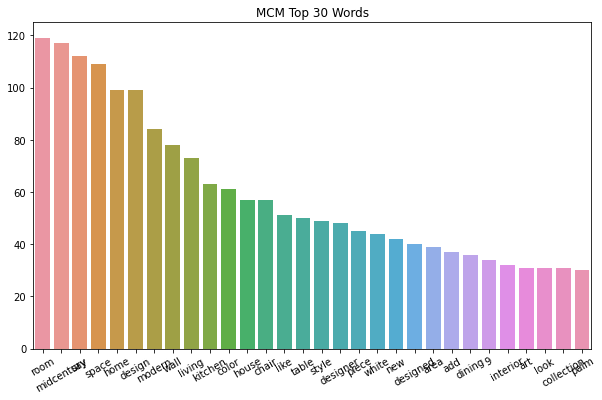

In [90]:
fig, ax = plt.subplots(figsize=(10,6))

mcm_plot = sns.barplot(x=mcm_fd.index, y=mcm_fd.values, ax=ax)
plt.xticks(rotation=30);
plt.title('MCM Top 30 Words');

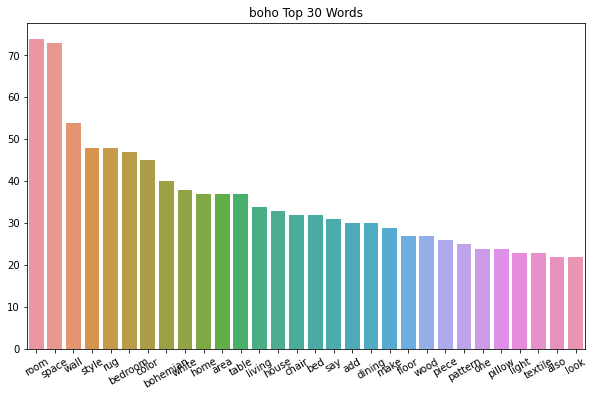

In [91]:
fig, ax = plt.subplots(figsize=(10,6))

boho_plot = sns.barplot(x=boho_fd.index, y=boho_fd.values, ax=ax)
plt.xticks(rotation=30);
plt.title('boho Top 30 Words');

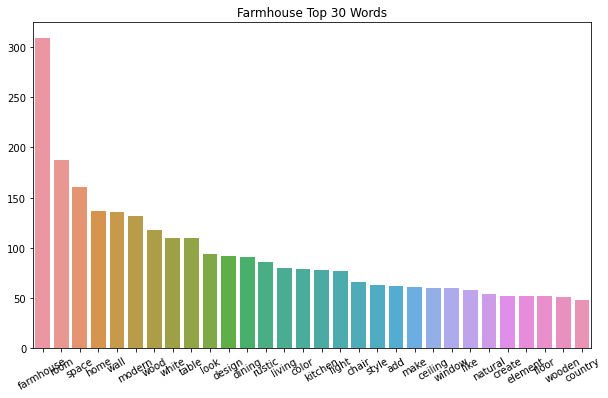

In [92]:
fig, ax = plt.subplots(figsize=(10,6))

farm_plot = sns.barplot(x=farm_fd.index, y=farm_fd.values, ax=ax)
plt.xticks(rotation=30);
plt.title('Farmhouse Top 30 Words');

### Preproccessing: NGrams

In [96]:
bgram = nltk.collocations.BigramAssocMeasures()
mcm_finder = nltk.BigramCollocationFinder.from_words(mcm_clean_stop)
mcm_scored = mcm_finder.score_ngrams(bgram.raw_freq)
mcm_scored[:30]

[(('midcentury', 'modern'), 0.004277393520203859),
 (('living', 'room'), 0.003458318165271205),
 (('palm', 'springs'), 0.0023662176920276664),
 (('coffee', 'table'), 0.0011831088460138332),
 (('midcentury', 'style'), 0.0011831088460138332),
 (('master', 'bedroom'), 0.0010921004732435385),
 (('living', 'space'), 0.0010010921004732435),
 (('new', 'york'), 0.0010010921004732435),
 (('dining', 'room'), 0.0009100837277029487),
 (('le', 'corbusier'), 0.0008190753549326539),
 (('christopher', 'kennedy'), 0.0007280669821623589),
 (('modern', 'design'), 0.0007280669821623589),
 (('dwell', 'life'), 0.0006370586093920641),
 (('inc', 'rights'), 0.0006370586093920641),
 (('kennedy', 'says'), 0.0006370586093920641),
 (('life', 'inc'), 0.0006370586093920641),
 (('midcentury', 'design'), 0.0006370586093920641),
 (('rights', 'reserved'), 0.0006370586093920641),
 (('santa', 'barbara'), 0.0006370586093920641),
 (('designer', 'says'), 0.0005460502366217692),
 (('dining', 'area'), 0.0005460502366217692),
 

In [97]:
bgram = nltk.collocations.BigramAssocMeasures()
boho_finder = nltk.BigramCollocationFinder.from_words(boho_clean_stop)
boho_scored = boho_finder.score_ngrams(bgram.raw_freq)
boho_scored[:30]

[(('bohemian', 'style'), 0.003017956843217142),
 (('living', 'room'), 0.003017956843217142),
 (('dining', 'table'), 0.001358080579447714),
 (('dining', 'room'), 0.0012071827372868568),
 (('boho', 'style'), 0.0010562848951259998),
 (('living', 'space'), 0.0010562848951259998),
 (('main', 'house'), 0.0010562848951259998),
 (('master', 'bedroom'), 0.0010562848951259998),
 (('area', 'rugs'), 0.0009053870529651426),
 (('family', 'room'), 0.0009053870529651426),
 (('light', 'fixture'), 0.0009053870529651426),
 (('santa', 'monica'), 0.0009053870529651426),
 (('white', 'walls'), 0.0009053870529651426),
 (('abstract', 'art'), 0.0007544892108042855),
 (('bar', 'cart'), 0.0007544892108042855),
 (('color', 'palette'), 0.0007544892108042855),
 (('dining', 'area'), 0.0007544892108042855),
 (('patterned', 'area'), 0.0007544892108042855),
 (('add', 'color'), 0.0006035913686434284),
 (('better', 'homes'), 0.0006035913686434284),
 (('click', 'purchase'), 0.0006035913686434284),
 (('compensation', 'click

In [98]:
bgram = nltk.collocations.BigramAssocMeasures()
farm_finder = nltk.BigramCollocationFinder.from_words(farm_clean_stop)
farm_scored = farm_finder.score_ngrams(bgram.raw_freq)
farm_scored[:30]

[(('modern', 'farmhouse'), 0.0059150764030702066),
 (('living', 'room'), 0.003943384268713471),
 (('dining', 'room'), 0.0029575382015351033),
 (('farmhouse', 'style'), 0.0022533624392648407),
 (('farmhouse', 'dining'), 0.0019716921343567355),
 (('farmhouse', 'living'), 0.001619604253221604),
 (('better', 'homes'), 0.0014787691007675516),
 (('homes', 'gardens'), 0.0014787691007675516),
 (('farmhouse', 'bathroom'), 0.0012675163720864727),
 (('farmhouse', 'kitchen'), 0.0012675163720864727),
 (('reclaimed', 'wood'), 0.0012675163720864727),
 (('click', 'purchase'), 0.001056263643405394),
 (('coffee', 'table'), 0.001056263643405394),
 (('compensation', 'click'), 0.001056263643405394),
 (('contained', 'website'), 0.001056263643405394),
 (('dining', 'table'), 0.001056263643405394),
 (('gardens', 'may'), 0.001056263643405394),
 (('links', 'contained'), 0.001056263643405394),
 (('may', 'receive'), 0.001056263643405394),
 (('purchase', 'links'), 0.001056263643405394),
 (('receive', 'compensation'

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
#data_dtm.to_pickle("dtm.pkl")
data_dtm

,abbot,ability,able,abode,abound,absorbent,abstract,abstracts,abundance,abundant,...,zandberg,zanger,zealand,zen,zenmeetscreativeyen,zero,zip,zoe,zone,étagère
index,,,,,,,,,,,,,,,,,,,,,
f,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f,0,0,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data_flipped = data_dtm.transpose()
data_flipped.head()

index,f,f,f,f,f,f,f,f,f,f,...,b,b,b,b,b,b,b,b,b,b
abbot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,2,1,0,1,3,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
abode,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abound,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
top_30 = {}
for s in data_flipped.columns:
    top = data_flipped[s].sort_values(ascending=False).head(30)
    top_30[s]= list(zip(top.index, top.values))

#top_30

TypeError: sort_values() missing 1 required positional argument: 'by'

In [15]:
for style, top_words in top_30.items():
    print(style)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

In [63]:
# Look at the most common top words across all styles
from collections import Counter

words = []
for style in data_flipped.columns:
    top = [word for (word, count) in top_30[style]]
    for t in top:
        words.append(t)

In [64]:
#of all these top words, how many of them are in the top for all three styles? Remove those as they won't have much value
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['room',
 'says',
 'space',
 'modern',
 'home',
 'living',
 'style',
 'table',
 'white',
 'walls',
 'color',
 'wall',
 'dining',
 'look']

In [65]:
data_clean = pd.read_pickle('corpus.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.article_body)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [66]:
data_stop

,abbot,ability,able,abode,abound,abounds,absorbent,abstract,abstracts,abundance,...,zach,zanger,zealand,zen,zenmeetscreativeyen,zero,zip,zoe,zone,étagère
MCM,0,1,2,1,0,0,0,3,1,2,...,0,2,0,1,0,1,0,0,0,1
Boho-Chic,1,0,3,0,1,1,1,10,0,0,...,2,0,0,0,1,0,1,0,0,0
Farmhouse,0,0,8,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [67]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [68]:
data_clean

,article_body
MCM,when i do something i go deep so when it came ...
Boho-Chic,it was a homecoming of sorts since setting up ...
Farmhouse,when actor sam page and his wife cassidy ellio...


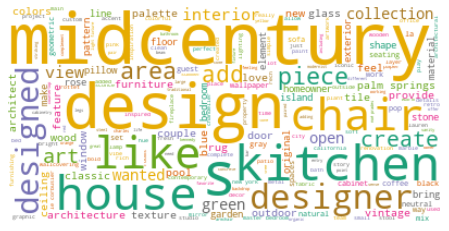

In [69]:
plt.rcParams['figure.figsize'] = [10, 4]

wc.generate(data_clean.article_body['MCM'])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show;

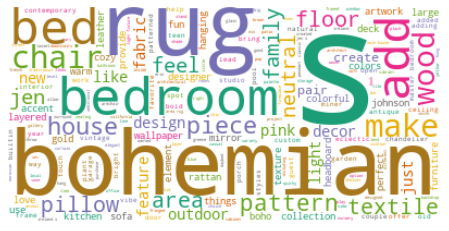

In [70]:
plt.rcParams['figure.figsize'] = [10, 4]

wc.generate(data_clean.article_body['Boho-Chic'])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show;

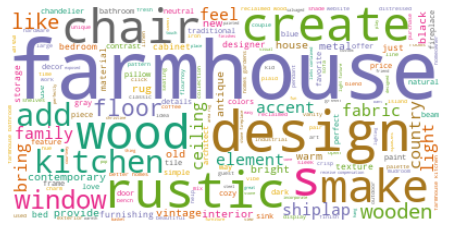

In [71]:
plt.rcParams['figure.figsize'] = [10, 4]

wc.generate(data_clean.article_body['Farmhouse'])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show;

In [72]:
print('# of Words Before Removing Stop Words')
print('MCM: ', len(data_clean.article_body[0].split()))
print('Boho-Chic: ', len(data_clean.article_body[1].split()))
print('Farmhouse: ', len(data_clean.article_body[2].split()))

# of Words Before Removing Stop Words
MCM:  17633
Boho-Chic:  11009
Farmhouse:  22514


In [73]:
print('# of Words After Cleaning')
print(data_stop.astype(bool).sum(axis=1))

# of Words After Cleaning
MCM          3644
Boho-Chic    2394
Farmhouse    3641
dtype: int64


In [74]:
data_tdm = data_stop.transpose()
data_tdm.head()

,MCM,Boho-Chic,Farmhouse
abbot,0,1,0
ability,1,0,0
able,2,3,8
abode,1,0,0
abound,0,1,0


In [75]:
mcm_dict = data_tdm.MCM.to_dict()
boho_dict = data_tdm['Boho-Chic'].to_dict()
farm_dict = data_tdm.Farmhouse.to_dict()

In [76]:
total_word_count = sum(mcm_dict.values())
mcm_count = Counter(mcm_dict)
mcm_30 = mcm_count.most_common(30)
print('MCM Word\t\t\tNormalized Frequency')
for word in mcm_30:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word, normalized_frequency))
print('')
    
total_word_count = sum(boho_dict.values())
boho_count = Counter(boho_dict)
boho_30 = boho_count.most_common(30)
print('Boho Word\t\t\tNormalized Frequency')
for word in boho_30:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word, normalized_frequency))
print('')

total_word_count = sum(farm_dict.values())
farm_count = Counter(farm_dict)
farm_30 = farm_count.most_common(30)
print('Farm Word\t\t\tNormalized Frequency')
for word in farm_30:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word, normalized_frequency))

MCM Word			Normalized Frequency
('midcentury', 135) 			 0.01413
('design', 88) 			 0.009211
('kitchen', 62) 			 0.006489
('house', 51) 			 0.005338
('like', 50) 			 0.005233
('new', 42) 			 0.004396
('designed', 41) 			 0.004291
('chairs', 34) 			 0.003559
('art', 33) 			 0.003454
('area', 31) 			 0.003245
('collection', 31) 			 0.003245
('create', 30) 			 0.00314
('designer', 29) 			 0.003035
('palm', 29) 			 0.003035
('wanted', 29) 			 0.003035
('natural', 28) 			 0.002931
('springs', 28) 			 0.002931
('light', 27) 			 0.002826
('vintage', 27) 			 0.002826
('wood', 27) 			 0.002826
('green', 26) 			 0.002721
('pieces', 26) 			 0.002721
('love', 25) 			 0.002617
('palette', 25) 			 0.002617
('add', 24) 			 0.002512
('architecture', 24) 			 0.002512
('bedroom', 24) 			 0.002512
('furniture', 24) 			 0.002512
('interior', 24) 			 0.002512
('open', 24) 			 0.002512

Boho Word			Normalized Frequency
('bedroom', 40) 			 0.007029
('bohemian', 40) 			 0.007029
('area', 36) 			 0.006326
('rug

In [77]:
wn = nltk.WordNetLemmatizer()

lem_mcm=[' '.join([wn.lemmatize(word, pos = 'v') for word in text.split(' ')])
          for text in data_clean.article_body[:1]]
lem_boho=[' '.join([wn.lemmatize(word, pos = 'v') for word in text.split(' ')])
          for text in data_clean.article_body[1:2]]
lem_farm=[' '.join([wn.lemmatize(word, pos = 'v') for word in text.split(' ')])
          for text in data_clean.article_body[2:]]

In [78]:
lem_mcm

['when i do something i go deep so when it come time to find a new home in marin county last october—after sell a muchloved  ernest coxhead in pacific heights—it be time for an architectural palette cleanser goodbye lead pane windows and handcarved moody majesty hello open floor plan democratic design and glass wall i want midcentury in california midcentury modern often mean eichler the  specimen i find be pure—with original luminous philippine mahogany wall and sapphire walltowall carpet a dream manifestation before the original wall leave something to be desire both in paint condition and color choice “the green wall compete with the greenery” say lauren who want a backdrop for the roses to be the star and that keep the historical integrity of the  space swiss architect le corbusier a pioneer of midcenturymodern design—also a painter and color theorist—was top of the list when it come to a choose palette “le corbusier be a primary inspiration for the house work with his pigmentrich 

In [94]:
lem_dict = {'MCM': lem_mcm, 'BohoChic': lem_boho, 'Farmhouse': lem_farm}
data_lem_df = pd.DataFrame.from_dict(lem_dict, columns = data_clean.columns, orient = 'index')

In [95]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_lem_df.article_body)
data_lem = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_lem.index = data_clean.index

# Pickle it for later use
import pickle
data_lem.to_pickle("dtm_lem.pkl")

In [96]:
data_lem

,abbot,abide,ability,able,abound,absorbent,abstract,abundance,abundant,academic,...,zach,zanger,zealand,zen,zenmeetscreativeyen,zero,zip,zoe,zone,étagère
MCM,0,1,1,2,0,0,4,2,0,1,...,0,2,0,1,0,1,0,0,0,1
Boho-Chic,1,0,0,3,2,1,10,0,0,0,...,2,0,0,0,1,0,1,0,0,0
Farmhouse,0,0,0,8,0,1,1,0,2,0,...,0,0,1,0,0,0,0,1,1,0


In [82]:
# Recreate document-term matrix while adding max_df
cv = CountVectorizer(stop_words=stop_words, max_df = .85)
data_cv = cv.fit_transform(data_lem_df.article_body)
data_lem2 = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_lem2.index = data_clean.index

In [83]:
data_lem2

,abbot,abide,ability,abound,absorbent,abundance,abundant,academic,accents,accentuate,...,zach,zanger,zealand,zen,zenmeetscreativeyen,zero,zip,zoe,zone,étagère
MCM,0,1,1,0,0,2,0,1,0,6,...,0,2,0,1,0,1,0,0,0,1
Boho-Chic,1,0,0,2,1,0,0,0,0,0,...,2,0,0,0,1,0,1,0,0,0
Farmhouse,0,0,0,0,1,0,2,0,1,1,...,0,0,1,0,0,0,0,1,1,0


This removes 'abstract' - which I'm not sure I want. I'm also seeing that the lemmatization didn't seem to work either.

In [84]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

mcm_stem = [' '.join([ps.stem(word) for word in text.split(' ')])
          for text in data_clean.article_body[:1]]
mcm_stem

['when i do someth i go deep so when it came time to find a new home in marin counti last october—aft sell a muchlov  ernest coxhead in pacif heights—it wa time for an architectur palett cleanser goodby lead pane window and handcarv moodi majesti hello open floor plan democrat design and glass wall i want midcenturi in california midcenturi modern often mean eichler the  specimen i found wa pure—with origin lumin philippin mahogani wall and sapphir walltowal carpet a dream manifest befor the origin wall left someth to be desir both in paint condit and color choic “the green wall compet with the greenery” say lauren who want a backdrop for the rose to be the star and that kept the histor integr of the  space swiss architect le corbusi a pioneer of midcenturymodern design—also a painter and color theorist—wa top of the list when it came to a choos palett “le corbusi wa a primari inspir for the hous work with hi pigmentrich pure color histor paint wa a dream” after beneath the eyepop spec

I wanted to try stemming instead of lemmitization but it clearly isn't the right choice for this dataset.

In [145]:
y = data_lem2.index
x = data_lem2.reset_index()
x = x.drop(columns = 'index')

In [146]:
x

,level_0,abbot,abide,ability,abound,absorbent,abundance,abundant,academic,accents,...,zach,zanger,zealand,zen,zenmeetscreativeyen,zero,zip,zoe,zone,étagère
0,0,0,1,1,0,0,2,0,1,0,...,0,2,0,1,0,1,0,0,0,1
1,1,1,0,0,2,1,0,0,0,0,...,2,0,0,0,1,0,1,0,0,0
2,2,0,0,0,0,1,0,2,0,1,...,0,0,1,0,0,0,0,1,1,0


In [147]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x, y)

In [148]:
for doc, category in zip(docs_new, predicted):
    print("{0} => {1}".format(doc, news_groups_train.target_names[category]))

MultinomialNB()